<a href="https://colab.research.google.com/github/AbhayKhamkar/Machine_learning-/blob/main/Analyze_sentiment_in_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project:Analyze sentiment in movie reviews

Aim:  Apply K-Means clustering to segment customers based on their purchase behavior and analyze sentiment in movie reviews.

Description: Use Natural Language Processing (NLP) techniques to preprocess text data and build a sentiment analysis model.

Datasets: IMDb Movie Reviews dataset for sentiment analysis (https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
and a customer purchase behavior dataset(https://archive.ics.uci.edu/dataset/352/online+retail).

In [ ]:
# Import important libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import regex as re

In [ ]:
# df1 = IMDB dataset
df1=pd.read_csv('/content/IMDB Dataset.csv')
# df2 = Online Retail dataset
df2=pd.read_excel('/content/Online Retail.xlsx')

Some Function which will help us for cleaning

In [ ]:
#
def get_null_info(dataframe):
    null_vals = dataframe.isnull().sum()

    df_null_vals = pd.concat({'Null Count': null_vals,
                              'Percent Missing (%)': round(null_vals * 100 / len(dataframe), 2)}, axis=1)

    return df_null_vals.sort_values(by=['Null Count'], ascending=False)

In [ ]:
# Preprocess function
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemTitles(title):
    words = nltk.word_tokenize(title)
    words = [re.sub("[^a-zA-Z0-9]","",i).lower().strip() for i in words]
    words = [lemmatizer.lemmatize(i) for i in words if i not in stopwords]
    title = " ".join(words)
    return title

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 IMDB dataset cleaning

In [ ]:
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Preprocess the movie reviews dataset
nltk.download('wordnet')
nltk.download('punkt')
df1['review']=df1['review'].apply(lemTitles)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df1.head()

,review,sentiment
0,one reviewer mentioned watching 1 oz episode h...,positive
1,wonderful little production br br filmi...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombi...,negative
4,petter mattei love time money visually stunn...,positive


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df1.shape

(50000, 2)

In [ ]:
df1.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df1.duplicated().sum()

423

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1.shape

(49577, 2)

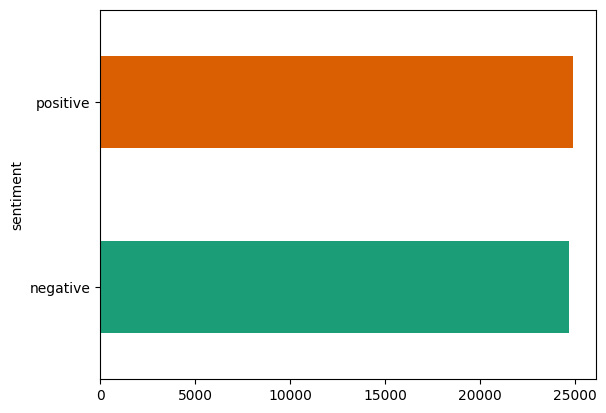

In [ ]:
df1.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]]

In [ ]:
X=df1['review']
y=df1['sentiment']

In [ ]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test= train_test_split(X,y)

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train a Naive Bayes classifier for sentiment analysis
sentiment_classifier = MultinomialNB(alpha=1.1)
sentiment_classifier.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.1)

In [ ]:
sentiment_classifier.score(X_test_tfidf,y_test)

0.8701895925776523

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB(priors=[0.1,0.9])
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()
model.fit(X_train_dense, y_train)

GaussianNB(priors=[0.1, 0.9])

In [ ]:
model.score(X_test_dense,y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'alpha':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
}
grid_MNB = GridSearchCV(MultinomialNB(),param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_MNB.fit(X_train_tfidf, y_train)

In [ ]:
grid_MNB.best_params_

{'alpha': 1.1}

In [ ]:
from sklearn.model_selection import GridSearchCV
param={
    'priors':[[0.3,0.7],[0.5,0.5],[0.4,0.6],[0.2,0.8],[0.1,0.9],[0.7,0.3],[0.6,0.4],[0.8,0.2],[0.9,0.1]]
}
grid_NB = GridSearchCV(GaussianNB(),param_grid=param, scoring='accuracy', cv=10)

In [ ]:
grid_NB.fit(X_train_dense, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'priors': [[0.3, 0.7], [0.5, 0.5], [0.4, 0.6],
                                    [0.2, 0.8], [0.1, 0.9], [0.7, 0.3],
                                    [0.6, 0.4], [0.8, 0.2], [0.9, 0.1]]},
             scoring='accuracy')

In [ ]:
grid_NB.best_params_

{'priors': [0.1, 0.9]}

Online Retail dataset cleaning

In [ ]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df2.shape

(541909, 8)

In [ ]:
df2.duplicated().sum()

5268

In [ ]:
df2['InvoiceNo'].nunique()

25900

In [ ]:
df2[df2['InvoiceNo'].str.startswith('C')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df2['InvoiceNo'] = df2['InvoiceNo'].replace('C', '')
df2.shape,df2['InvoiceNo'].nunique()

((541909, 8), 25900)

In [ ]:
df2.duplicated().sum()

5268

In [ ]:
df2=df2.drop_duplicates()
df2.shape

(536641, 8)

In [ ]:
df2['Country'].unique(),df2['Country'].nunique()

(array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
        'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
        'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
        'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
        'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
        'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
        'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
        'European Community', 'Malta', 'RSA'], dtype=object),
 38)

In [ ]:
df2['Quantity'].unique(),df2['Quantity'].nunique()

(array([     6,      8,      2,     32,      3,      4,     24,     12,
            48,     18,     20,     36,     80,     64,     10,    120,
            96,     23,      5,      1,     -1,     50,     40,    100,
           192,    432,    144,    288,    -12,    -24,     16,      9,
           128,     25,     30,     28,      7,     56,     72,    200,
           600,    480,     -6,     14,     -2,     11,     33,     13,
            -4,     -5,     -7,     -3,     70,    252,     60,    216,
           384,    -10,     27,     15,     22,     19,     17,     21,
            34,     47,    108,     52,  -9360,    -38,     75,    270,
            42,    240,     90,    320,   1824,    204,     69,    -36,
          -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
            26,   1440,     31,     82,     78,     97,     98,     35,
            57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
          -120,    -40,    -25,    -14,    -15,    -69,   -140, 

In [ ]:
df2[df2['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
df2['Quantity'] = df2['Quantity'].apply(lambda x: abs(x) if isinstance(x, int) and x < 0 else x)

In [ ]:
df2['Quantity'].unique(),df2['Quantity'].nunique()

(array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
           18,    20,    36,    80,    64,    10,   120,    96,    23,
            5,     1,    50,    40,   100,   192,   432,   144,   288,
           16,     9,   128,    25,    30,    28,     7,    56,    72,
          200,   600,   480,    14,    11,    33,    13,    70,   252,
           60,   216,   384,    27,    15,    22,    19,    17,    21,
           34,    47,   108,    52,  9360,    38,    75,   270,    42,
          240,    90,   320,  1824,   204,    69,   160,  2880,  1400,
           39,    26,  1440,    31,    82,    78,    97,    98,    35,
           57,   110,   130,   140,   720,   156,   324,    37,    49,
           95,    29,    41,    43,    44,   402,   378,   150,   300,
           54,   104,    67,   258,    66,    55,    46,    99,    61,
          408,   972,   208,  1008,  1000,    77,  1488,   250,  1394,
          400,   223,   723,   177,    79,    84,   272,   145,   113,
      

In [ ]:
df2.shape

(536641, 8)

In [ ]:
df2.isna().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [ ]:
get_null_info(df2)

,Null Count,Percent Missing (%)
CustomerID,135037,25.16
Description,1454,0.27
InvoiceNo,0,0.00
StockCode,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
UnitPrice,0,0.00
Country,0,0.00


In [ ]:
df2.dropna(axis = 0, inplace = True)

In [ ]:
df2.shape

(401604, 8)

In [ ]:
get_null_info(df2)

,Null Count,Percent Missing (%)
InvoiceNo,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


In [ ]:
df2['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 401604, dtype: object

In [ ]:
# Preprocess the Description
nltk.download('wordnet')
nltk.download('punkt')
df2['Description']=df2['Description'].apply(lemTitles)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df2['Description']

0           white hanging heart tlight holder
1                         white metal lantern
2               cream cupid heart coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart 
                         ...                 
541904                pack 20 spaceboy napkin
541905                 child apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908           baking set 9 piece retrospot
Name: Description, Length: 401604, dtype: object

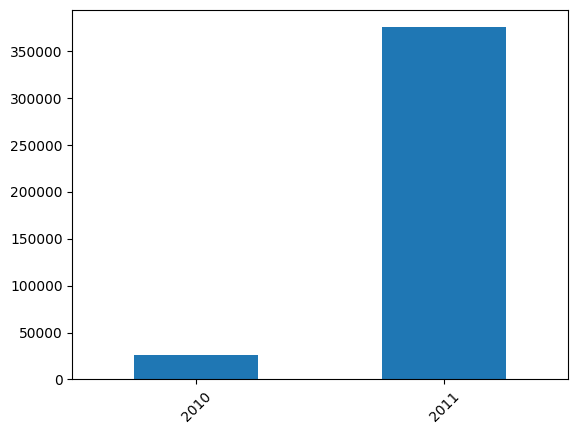

In [ ]:
df2.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45);

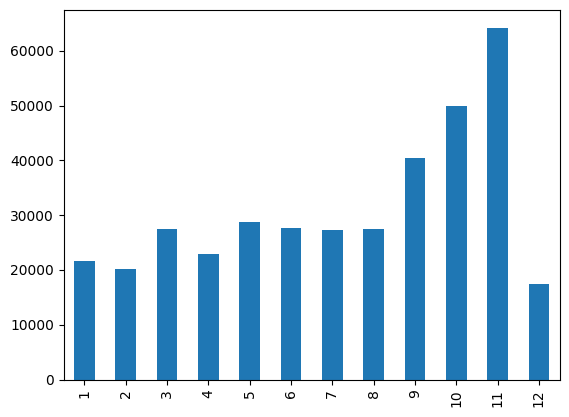

In [ ]:
df2[df2.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar');

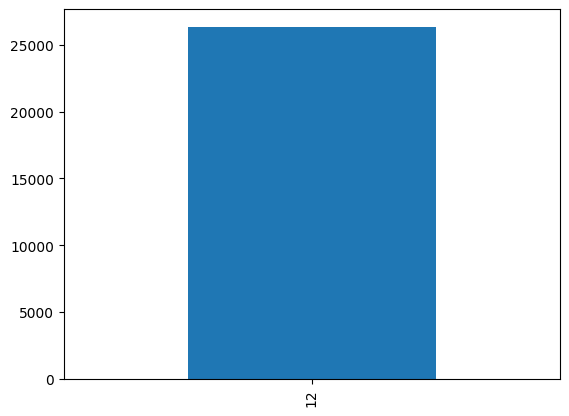

In [ ]:
df2[df2.InvoiceDate.dt.year==2010].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar');

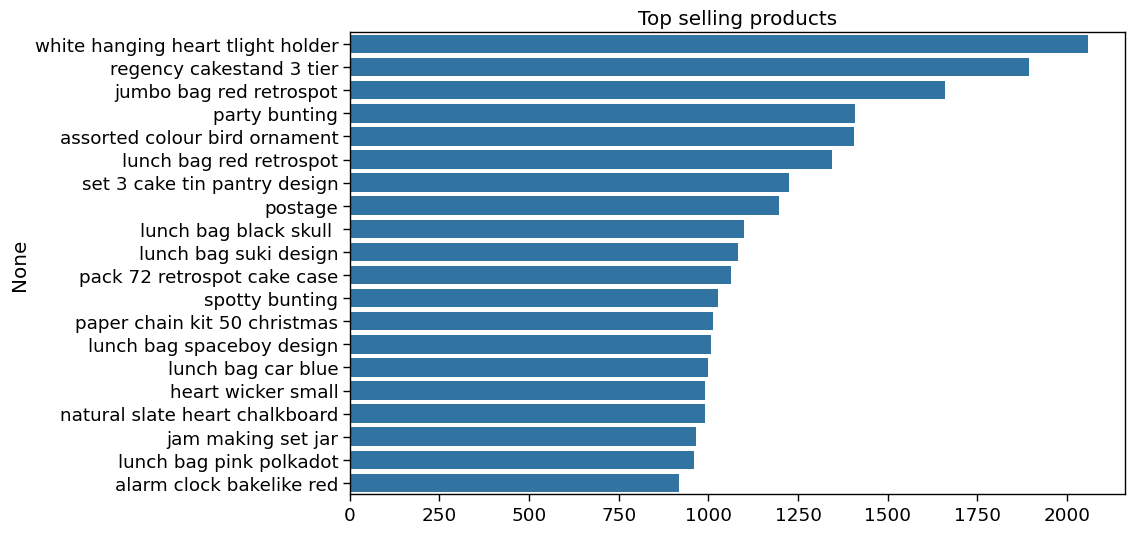

In [ ]:
# Let's visualize some top products from the whole range.
top_products = df2['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();

Calculate Recency, Frequency, and Monetary values for each customer

In [ ]:
rfm_df=df2.copy()

In [ ]:
# Calculating Recency.
recency = rfm_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (pd.to_datetime(recency['InvoiceDate'].max()) - recency['InvoiceDate']).dt.days
recency.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [ ]:
# Calculating Frequency.
frequency = rfm_df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
# Calculating Monetary.
rfm_df['TotalSpending']=rfm_df['Quantity']*rfm_df['UnitPrice']
monetary = rfm_df.groupby('CustomerID')['TotalSpending'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,154367.20
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
# Merge RFM values.
rfm_df = recency[['CustomerID', 'Recency']].merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,154367.20
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


RFM Segment creation

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 13812.75, 0.5: 15300.5, 0.75: 16778.25},
 'Recency': {0.25: 16.0, 0.5: 49.0, 0.75: 142.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 307.43, 0.5: 674.69, 0.75: 1691.7}}

In [ ]:
# Customer segments with RFM Model
rfm_df['Recency_Score'] = rfm_df['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_df['Frequency_Score'] = rfm_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_df['Monetary_Score'] = rfm_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
rfm_df['RFMScore'] = rfm_df.Recency_Score.map(str) \
                            + rfm_df.Frequency_Score.map(str) \
                            + rfm_df.Monetary_Score.map(str)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFMScore
0,12346.0,325,2,154367.20,1,2,4,124
1,12347.0,1,7,4310.00,4,4,4,444
2,12348.0,74,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,309,1,334.40,1,1,2,112


Best Recency score = 4,3

Best Frequency score = 4,3

Best Monetary score = 4,3

Good Recency score = 2,3

Good Frequency score = 2,3

Good Monetary score = 2,3

Low Recency score = 1,2

Low Frequency score = 1,2

Low Monetary score = 1,2

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4372 non-null   float64
 1   Recency          4372 non-null   int64  
 2   Frequency        4372 non-null   int64  
 3   Monetary         4372 non-null   float64
 4   Recency_Score    4372 non-null   int64  
 5   Frequency_Score  4372 non-null   int64  
 6   Monetary_Score   4372 non-null   int64  
 7   RFMScore         4372 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 307.4+ KB


In [ ]:
rfm_df['RFMScore'].unique(),rfm_df['RFMScore'].nunique()

(array(['124', '444', '234', '314', '112', '344', '111', '113', '324',
        '423', '224', '222', '433', '123', '411', '223', '313', '422',
        '214', '334', '144', '322', '122', '212', '312', '233', '114',
        '244', '213', '434', '311', '424', '121', '343', '443', '413',
        '221', '333', '321', '323', '134', '421', '142', '211', '232',
        '412', '432', '243', '132', '143', '332', '431', '242', '231',
        '133', '331', '442', '342', '414', '131', '441', '141'],
       dtype=object),
 62)

In [ ]:
#RFM Segment allocation
segment_dict = {
    'Best Customers':['444','443'],                                                 # High recency, high frequency, high monetary value.These are your most valuable and engaged customers.
    'Loyal Customers':['344','244','233','234','343'],                              # Good recency, High frequency, high monetary value.These are not as recent as champions, they are still frequent and valuable.
    'Potential Loyalists Customer':['434','333','433','334'],                       # High recency, Good frequent, high in monetary value.These customers have recently made purchases and may become loyal with more engagement.
    'At-Risk Customers':['243','143','134','144','133'],                            # Low recency, High frequency, and high monetary value.These customers were active, but it has been a while since their last purchase.
    "Can't loss this Customers":['424','414','323','313','413','324','314','423'],  # High recency, low frequency, and high monetary value.These customers make significant purchases but infrequently.
    'Lost Customers':['222','111','212','121','211','112','221','122'],             # Low recency, low frequency, and low monetary value.These are customers who have not engaged in a long time and may be considered lost or inactive.
}

In [ ]:
# Invert the dictionary for easy mapping
inverse_segment_dict = {cust_id: segment for segment, cust_ids in segment_dict.items() for cust_id in cust_ids}

In [ ]:
# Map RFMScore to Segment
rfm_df['Segment'] = rfm_df['RFMScore'].map(inverse_segment_dict)

In [ ]:
# Allocate all remaining customers to New Customer segment category
rfm_df.Segment.fillna('New Customer', inplace=True)  # Recently acquired customers, irrespective of frequency & monetary value. These are customers in the early stages of their relationship with business.

In [ ]:
rfm_df['Segment'].unique()

array(['New Customer', 'Best Customers', 'Loyal Customers',
       "Can't loss this Customers", 'Lost Customers',
       'Potential Loyalists Customer', 'At-Risk Customers'], dtype=object)

In [ ]:
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFMScore,Segment
0,12346.0,325,2,154367.20,1,2,4,124,New Customer
1,12347.0,1,7,4310.00,4,4,4,444,Best Customers
2,12348.0,74,4,1797.24,2,3,4,234,Loyal Customers
3,12349.0,18,1,1757.55,3,1,4,314,Can't loss this Customers
4,12350.0,309,1,334.40,1,1,2,112,Lost Customers
5,12352.0,35,11,3466.67,3,4,4,344,Loyal Customers
6,12353.0,203,1,89.00,1,1,1,111,Lost Customers
7,12354.0,231,1,1079.40,1,1,3,113,New Customer
8,12355.0,213,1,459.40,1,1,2,112,Lost Customers
9,12356.0,22,3,2811.43,3,2,4,324,Can't loss this Customers


In [ ]:
# Segment

rfm_df.groupby('Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]]

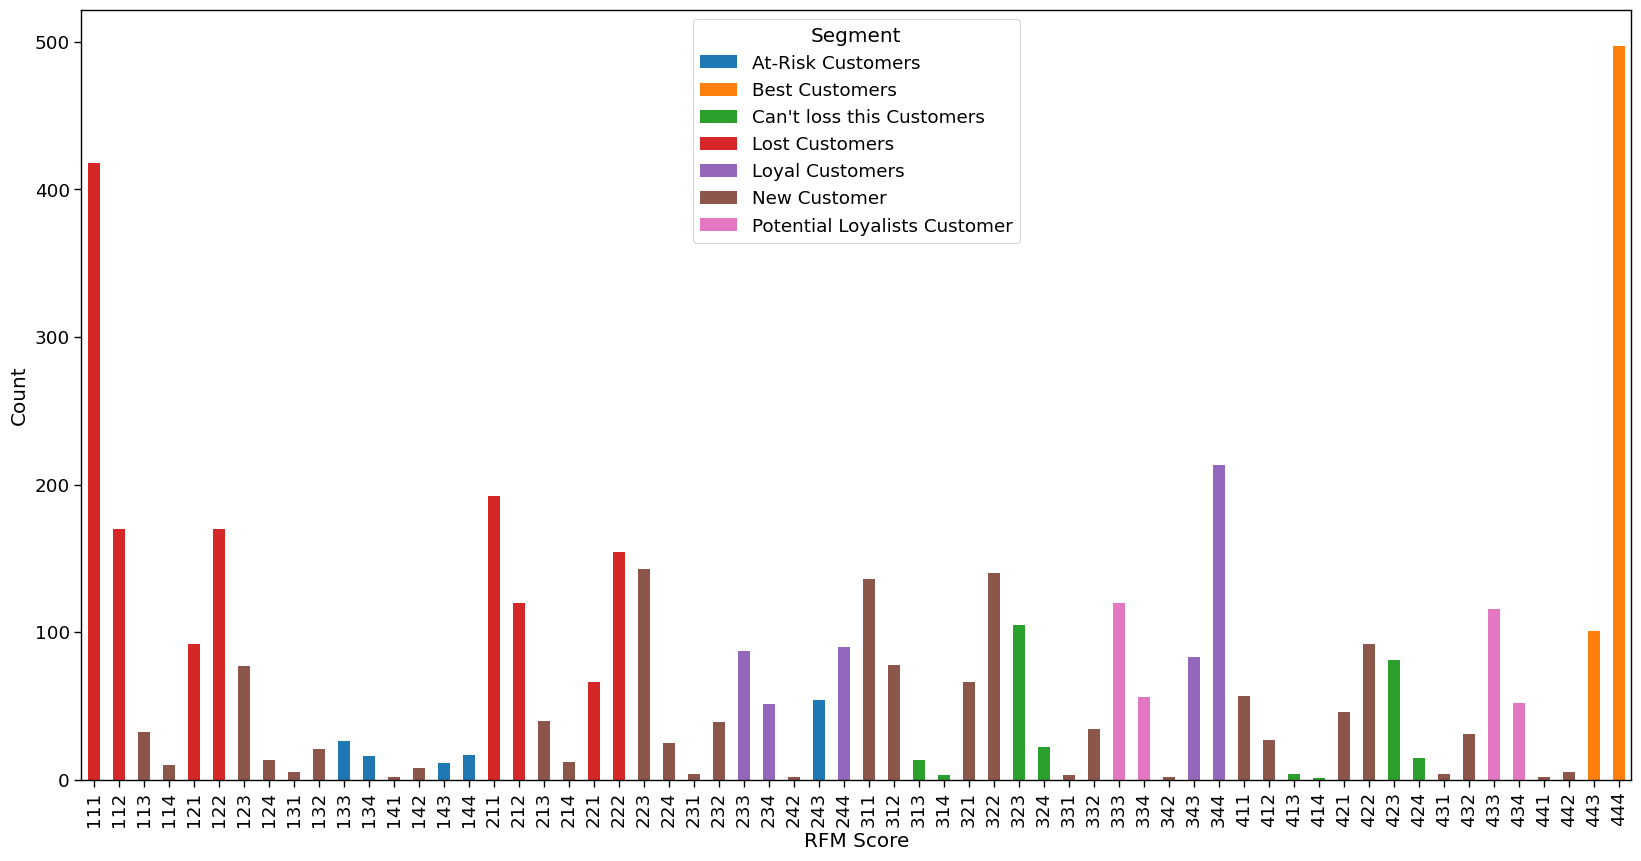

In [ ]:
# title Segment Distribution by RFM Score

plt.rcParams['figure.figsize'] = [20, 10]
rfm_df.groupby(['RFMScore', 'Segment']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('RFM Score')
_ = plt.ylabel('Count')

Applying K-Means Clustering

In [ ]:
# Standardize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

In [ ]:
# Apply K-Means clustering to RFM data
kmeans_rfm = KMeans(n_clusters=3, random_state=42)
rfm_df['Cluster'] = kmeans_rfm.fit_predict(rfm_scaled)
rfm_df[['CustomerID', 'Cluster']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Cluster
0,12346.0,2
1,12347.0,1
2,12348.0,1
3,12349.0,1
4,12350.0,0
...,...,...
4367,18280.0,0
4368,18281.0,0
4369,18282.0,1
4370,18283.0,1


In [ ]:
# finding best parameters for MultinomialNB classifier
from sklearn.model_selection import GridSearchCV
param={
    'n_neighbors':[1,2,3,4,5,6,7,8,9]
}
grid_knn = GridSearchCV(KMeans(),param_grid=param, scoring='accuracy', cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

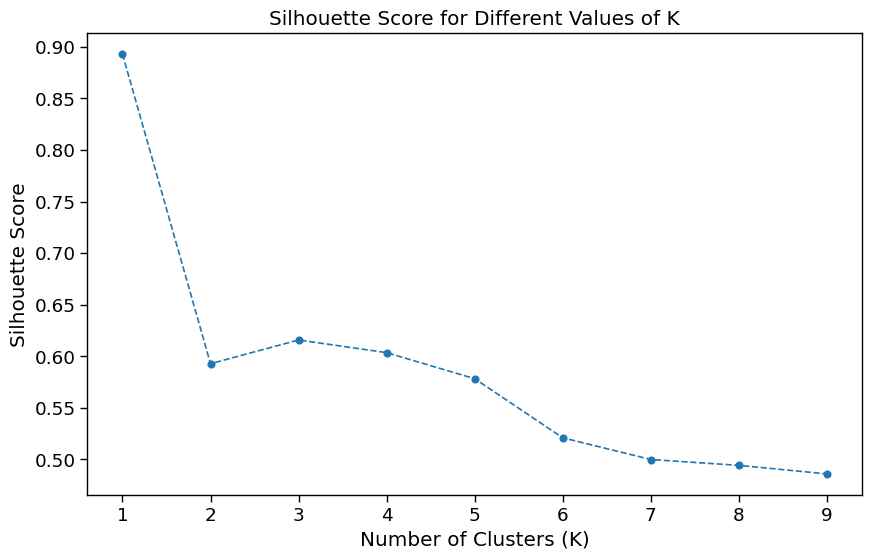

In [ ]:
# Plot silhouette score to find optimal K
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    silhouette_scores.append(silhouette_score(rfm_scaled, cluster_labels))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFMScore,Segment,Cluster
0,12346.0,325,2,154367.20,1,2,4,124,New Customer,2
1,12347.0,1,7,4310.00,4,4,4,444,Best Customers,1
2,12348.0,74,4,1797.24,2,3,4,234,Loyal Customers,1
3,12349.0,18,1,1757.55,3,1,4,314,Can't loss this Customers,1
4,12350.0,309,1,334.40,1,1,2,112,Lost Customers,0
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,277,1,180.60,1,1,1,111,Lost Customers,0
4368,18281.0,180,1,80.82,1,1,1,111,Lost Customers,0
4369,18282.0,7,3,179.50,4,2,1,421,New Customer,1
4370,18283.0,3,16,2045.53,4,4,4,444,Best Customers,1


In [ ]:
# Assign Cluster values to each customer in normalized dataframe
normal_df = rfm_df.assign(Cluster = cluster_labels)

# Melt normalized dataframe into long form to have all metric in same column
normal_melt = pd.melt(normal_df.reset_index(),
                      id_vars=['CustomerID','Cluster'],
                      value_vars=['Recency', 'Frequency', 'Monetary'],
                      var_name='Metric',
                      value_name='Value')
normal_melt.head()

,CustomerID,Cluster,Metric,Value
0,12346.0,7,Recency,325.0
1,12347.0,9,Recency,1.0
2,12348.0,0,Recency,74.0
3,12349.0,0,Recency,18.0
4,12350.0,1,Recency,309.0


<ipython-input-87-9a01279beac3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(normal_melt, x='Cluster', y='Metric', inner='box', palette='Dark2')


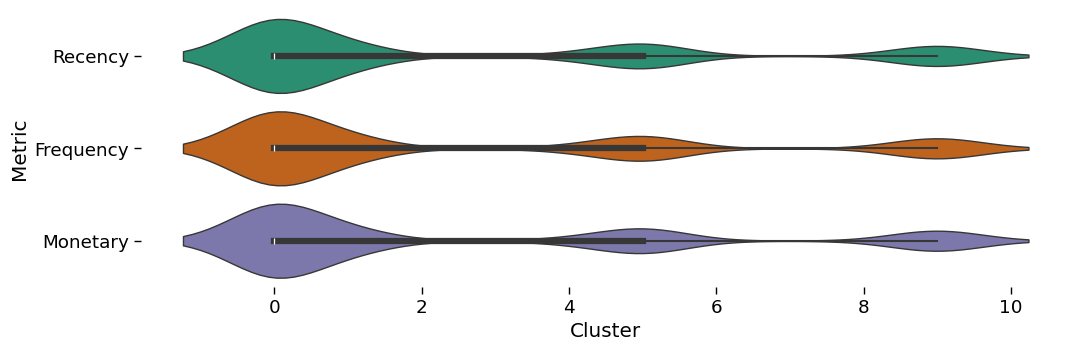

In [ ]:
# title Metric vs Cluster

figsize = (12, 1.2 * len(normal_melt['Metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(normal_melt, x='Cluster', y='Metric', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

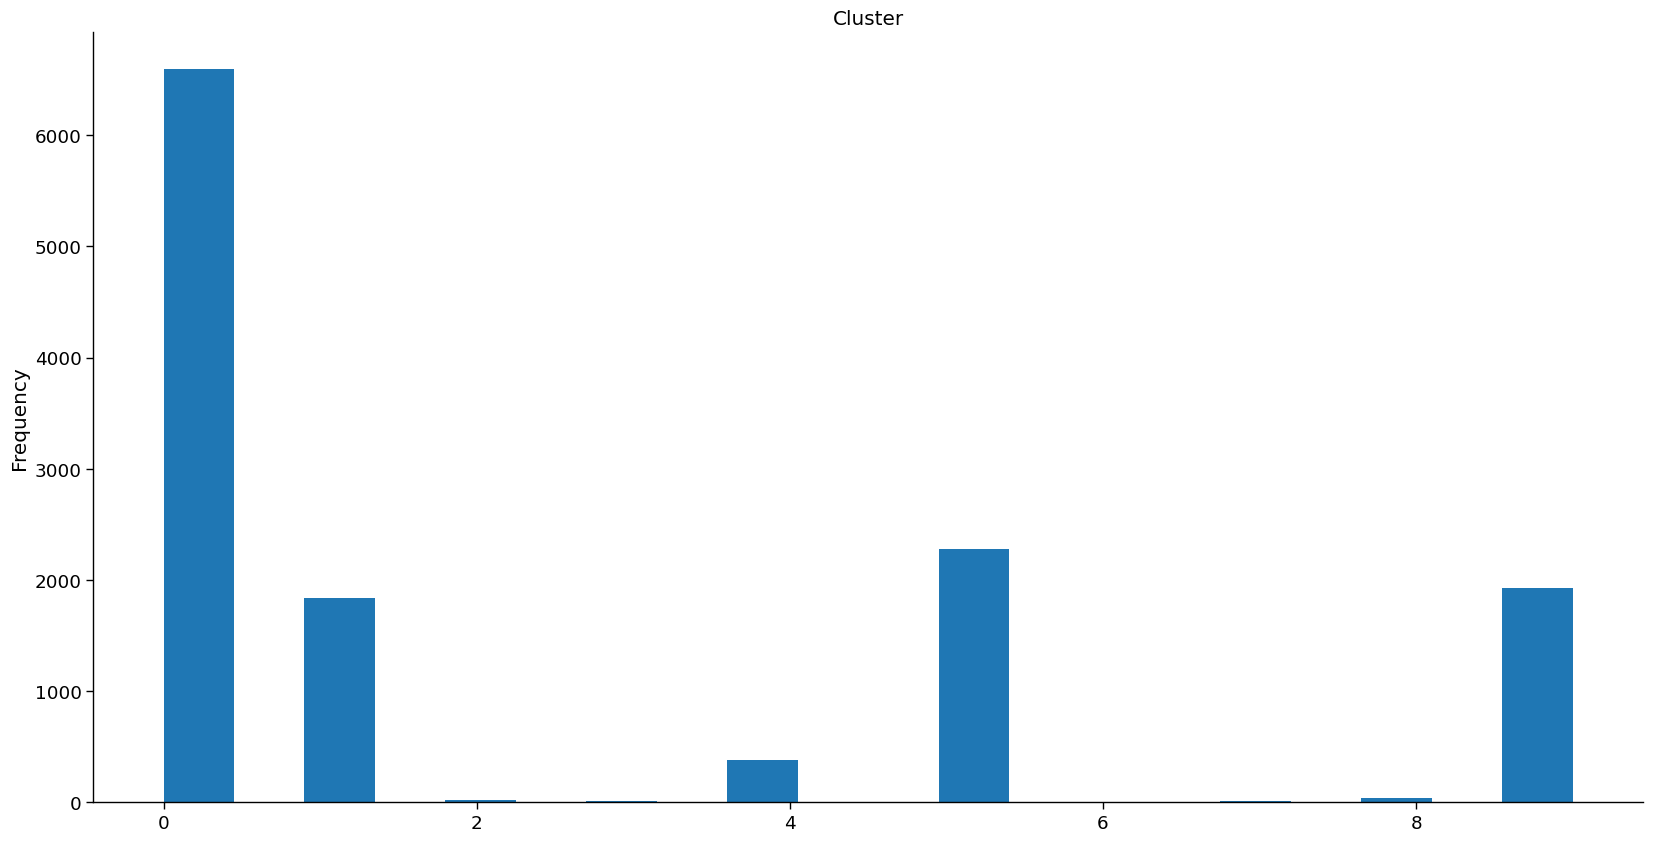

In [ ]:
# title Cluster

from matplotlib import pyplot as plt
normal_melt['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

Steps in the Project:

1.Data Acquisition:Obtain datasets for movie reviews and customer purchase behavior.

2.Data Preprocessing:Perform NLP techniques on movie reviews data to clean and preprocess the text.
Preprocess customer purchase behavior data to extract relevant features.

3.Sentiment Analysis:Build a sentiment analysis model using machine    learning algorithms.
Train the model on the preprocessed movie reviews data.
Evaluate the model's performance using appropriate metrics.

4.RFM Analysis:Integrate sentiment analysis results and RFM scores for customer segmentation.

5.Customer Segmentation:Apply K-Means clustering to segment customers based on their purchase behavior.
Select relevant features and preprocess the customer purchase behavior data.
Determine the optimal number of clusters using techniques like the elbow method.

6.Analysis and Interpretation:Analyze the results of sentiment analysis and customer segmentation.
Interpret the identified customer segments and their characteristics.